In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_all = "Output/2019_2020_mixed_beverage"
df_all = pd.read_csv(data_all, encoding="utf-8")

In [3]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1
5,17526234541,"THE KING LOUNGE, INC.",3684 ASBURY ST,DALLAS,TX,75205.0,57,1,THE KING LOUNGE INC,1602 MARKET CENTER BLVD,...,1996-02-15T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-01-16T00:00:00.000,2019,1
10,32061761998,WICKED WINGS LLC,615 W SLAUGHTER LN STE 108,AUSTIN,TX,78748.0,227,2,BUCKET'S BACKYARD BAR AND GRILL,9900 S INTERSTATE 35 BLDG M STE 200,...,2017-03-17T00:00:00.000,2019-01-31T00:00:00.000,8777,215,15076,0,24068,2019-09-09T00:00:00.000,2019,1
12,32059688088,"RICHMOND MIA BELLA, LLC",19 MAYMONT WAY,SPRING,TX,77382.0,170,1,MIA BELLA TRATTORIA,3773 RICHMOND AVE STE 1A,...,2017-05-09T00:00:00.000,2019-01-31T00:00:00.000,12965,25073,2298,0,40336,2019-06-13T00:00:00.000,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119989,32055936457,"CAFI TOULOUSE RIVER OAKS DISTRICT, LP",3100 MONTICELLO AVE STE 325,DALLAS,TX,75205.0,57,1,CAFE TOULOUSE,4444 WESTHEIMER RD STE E100,...,2015-05-29T00:00:00.000,2020-12-31T00:00:00.000,178933,206491,8562,0,393986,NaN,2020,12
119990,17215567953,"FUN AND SPIRITS, INC.",223 W RHAPSODY DR,SAN ANTONIO,TX,78216.0,15,1,CROSS-EYED SEAGULL,19141 STONE OAK PKWY # 206,...,2004-12-27T00:00:00.000,2020-12-31T00:00:00.000,35832,20,13969,0,49821,NaN,2020,12
119994,32070563070,KAPRI ULTRA LOUNGE LLC,6239 WARWICK GARDEN LN,SPRING,TX,77379.0,101,1,KAPRI ULTRA LOUNGE,5718 FAIRDALE LN,...,2019-08-21T00:00:00.000,2020-12-31T00:00:00.000,37373,232,369,0,37974,NaN,2020,12
119996,17430007959,"SJ2 RESTAURANT GROUP, LLC",PO BOX 100510,SAN ANTONIO,TX,78201.0,15,7,JARDIN,555 FUNSTON PL,...,2020-09-15T00:00:00.000,2020-12-31T00:00:00.000,20277,29423,1680,0,51380,NaN,2020,12


In [4]:
dfcities_2019 = dfcities.loc[dfcities.year == 2019]
dfcities_stores_2019 = dfcities_2019.groupby(['location_city','location_address'])['total_receipts'].sum().reset_index()
dallas_2019=dfcities_stores_2019.loc[dfcities_stores_2019.location_city == 'DALLAS']
houston_2019=dfcities_stores_2019.loc[dfcities_stores_2019.location_city == 'HOUSTON']
austin_2019=dfcities_stores_2019.loc[dfcities_stores_2019.location_city == 'AUSTIN']
ftworth_2019=dfcities_stores_2019.loc[dfcities_stores_2019.location_city == 'FORT WORTH']
sanantonio_2019=dfcities_stores_2019.loc[dfcities_stores_2019.location_city == 'SAN ANTONIO']

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9d3860ec40>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9d3860e520>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9d38572b20>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9d38572310>}

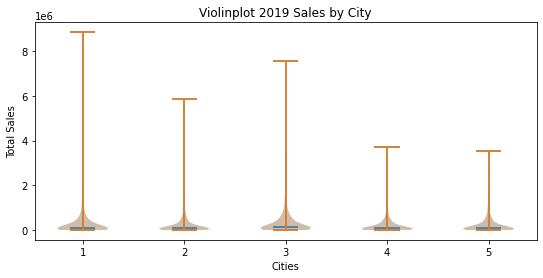

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
cities_stores_2019= [dallas_2019["total_receipts"],houston_2019["total_receipts"],austin_2019["total_receipts"],ftworth_2019["total_receipts"],sanantonio_2019["total_receipts"]]
fig1, axs = plt.subplots(nrows=1, figsize=(9, 4))
                          
# Create a figure instance
fig = plt.figure()

# plot violin plot
axs.violinplot(cities_stores_2019,
                  showmeans=False,
                  showmedians=True)

# Create the boxplot
axs.set_title('Violinplot 2019 Sales by City')
axs.set_ylabel('Total Sales')
axs.set_xlabel('Cities')
axs.violinplot(cities_stores_2019)

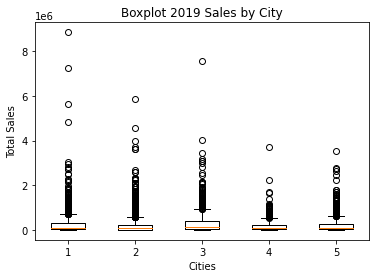

In [6]:
# Example outlier plot of reaction times
cities_stores_2019= [dallas_2019["total_receipts"],houston_2019["total_receipts"],austin_2019["total_receipts"],ftworth_2019["total_receipts"],sanantonio_2019["total_receipts"]]
fig1, ax1 = plt.subplots()

ax1.set_title('Boxplot 2019 Sales by City')
ax1.set_ylabel('Total Sales')
ax1.set_xlabel('Cities')
ax1.boxplot(cities_stores_2019)
plt.show()

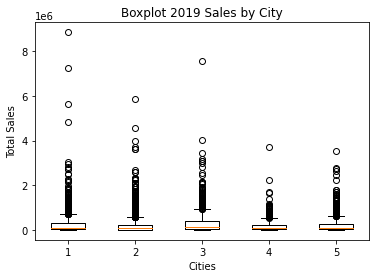

In [14]:
# Example outlier plot of reaction times
times = [dallas_2019["total_receipts"],houston_2019["total_receipts"],austin_2019["total_receipts"],ftworth_2019["total_receipts"],sanantonio_2019["total_receipts"]]
fig1, ax = plt.subplots()

ax.set_title('Boxplot 2019 Sales by City')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Cities')
ax.boxplot(cities_stores_2019)
plt.show()

NameError: name 'd' is not defined

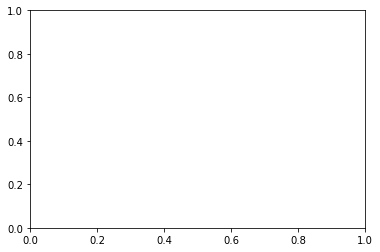

In [49]:
# Example outlier plot of reaction times
times = [dallas_2019["total_receipts"],houston_2019["total_receipts"],austin_2019["total_receipts"],ftworth_2019["total_receipts"],sanantonio_2019["total_receipts"]]
fig1, ax = plt.subplots()

#plot
box = plt.boxplot(d, showfliers=False)
# change the color of its elements
for _, line_list in box.items():
    for line in line_list:
        line.set_color('r')
        
ax.set_title('Boxplot 2019 Sales by City')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Cities')
ax.boxplot(cities_stores_2019)
plt.show()

In [30]:
dfcities_2020 = dfcities.loc[dfcities.year == 2020]
dfcities_stores_2020 = dfcities_2020.groupby(['location_city','location_address'])['total_receipts'].sum().reset_index()
dallas_2020=dfcities_stores_2020.loc[dfcities_stores_2020.location_city == 'DALLAS']
houston_2020=dfcities_stores_2020.loc[dfcities_stores_2020.location_city == 'HOUSTON']
austin_2020=dfcities_stores_2020.loc[dfcities_stores_2020.location_city == 'AUSTIN']
ftworth_2020=dfcities_stores_2020.loc[dfcities_stores_2020.location_city == 'FORT WORTH']
sanantonio_2020=dfcities_stores_2020.loc[dfcities_stores_2020.location_city == 'SAN ANTONIO']

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9d393735b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9d39373e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9d39a21eb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9d3709bb20>}

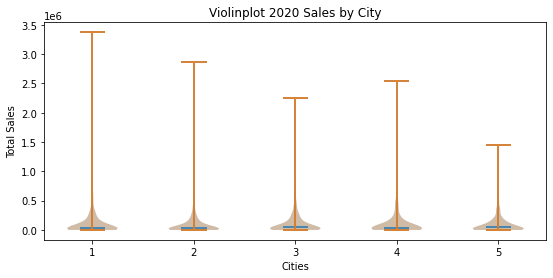

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
cities_stores_2020= [dallas_2020["total_receipts"],houston_2020["total_receipts"],austin_2020["total_receipts"],ftworth_2020["total_receipts"],sanantonio_2020["total_receipts"]]
fig1, axs = plt.subplots(nrows=1, figsize=(9, 4))
                          
# Create a figure instance
fig = plt.figure()

# plot violin plot
axs.violinplot(cities_stores_2020,
                  showmeans=False,
                  showmedians=True)

# Create the boxplot
axs.set_title('Violinplot 2020 Sales by City')
axs.set_ylabel('Total Sales')
axs.set_xlabel('Cities')
axs.violinplot(cities_stores_2020)

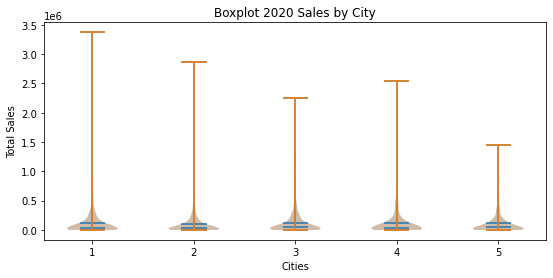

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
cities_stores_2020= [dallas_2020["total_receipts"],houston_2020["total_receipts"],austin_2020["total_receipts"],ftworth_2020["total_receipts"],sanantonio_2020["total_receipts"]]
fig1, axs = plt.subplots(nrows=1, figsize=(9, 4))
                          
# Create a figure instance
fig = plt.figure()

# plot violin plot
axs.violinplot(cities_stores_2020,
                  showmeans=True,
                  showmedians=True)

# Create the boxplot
axs.set_title('Boxplot 2020 Sales by City')
axs.set_ylabel('Total Sales')
axs.set_xlabel('Cities')
axs.violinplot(cities_stores_2020)
plt.show()

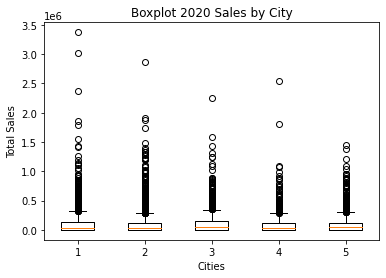

In [33]:
# Example outlier plot of reaction times
cities_stores_2020= [dallas_2020["total_receipts"],houston_2020["total_receipts"],austin_2020["total_receipts"],ftworth_2020["total_receipts"],sanantonio_2020["total_receipts"]]
fig1, ax1 = plt.subplots()

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot box plot
axs.boxplot(all_data)

ax1.set_title('Boxplot 2020 Sales by City')
ax1.set_ylabel('Total Sales')
ax1.set_xlabel('Cities')
ax1.boxplot(cities_stores_2020)
plt.show()